# Minimum spanning trees

*Selected Topics in Mathematical Optimization: 2017-2018*

**Michiel Stock** ([email](michiel.stock@ugent.be))

![](Figures/logo.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from minimumspanningtrees import red, green, blue, orange, yellow

## Graphs in python

Consider the following example graph:

![A small graph to show how to implement graphs in python.](Figures/graph.png)

This graph can be represented using an *adjacency list*. We do this using a `dict`. Every vertex is a key with the adjacent vertices given as a `set` containing tuples `(weight, neighbor)`. The weight is first because this makes it easy to compare the weights of two edges. Note that for every ingoing edges, there is also an outgoing edge, this is an undirected graph.

In [2]:
graph = {
    'A' : set([(2, 'B'), (2, 'D')]),
    'B' : set([(2, 'A'), (1, 'C')]),
    'C' : set([(1, 'B'), (2, 'D')]),
    'D' : set([(2, 'C'), (3, 'A')]),
    'E' : set([(2, 'B'), (1, 'C'), (3, 'D')])
}

Sometimes we will use an *edge list*, i.e. a list of (weighted) edges. This is often a more compact way of storing a graph. The edge list is given below. Note that again every edge is double: an in- and outgoing edge is included.

In [3]:
edges = [
 (1, 'B', 'C'),
 (2, 'D', 'C'),
 (2, 'A', 'B'),
 (1, 'C', 'B'),
 (3, 'A', 'D'),
 (2, 'C', 'D'),
 (3, 'D', 'E'),
 (2, 'B', 'E'),
 (1, 'C', 'E'),
 (2, 'B', 'A'),
 (2, 'D', 'A')]

We can easily turn one representation in the other (with a time complexity proportional to the number of edges) using the provided functions `edges_to_adj_list` and `adj_list_to_edges`.

In [4]:
from minimumspanningtrees import edges_to_adj_list, adj_list_to_edges

In [5]:
adj_list_to_edges(graph)

[(2, 'B', 'A'),
 (2, 'D', 'A'),
 (2, 'A', 'B'),
 (1, 'C', 'B'),
 (1, 'B', 'C'),
 (2, 'D', 'C'),
 (3, 'A', 'D'),
 (2, 'C', 'D'),
 (3, 'D', 'E'),
 (1, 'C', 'E'),
 (2, 'B', 'E')]

In [89]:
edges_to_adj_list(edges)

{'Atlanta': {(1, 'Nashville'),
  (2, 'Charleston'),
  (2, 'Raleigh'),
  (4, 'New Orleans'),
  (5, 'Miami')},
 'Boston': {(2, 'Montreal'), (2, 'New York')},
 'Calcary': {(3, 'Vancouver'), (4, 'Helena'), (4, 'Seattle'), (6, 'Winnipec')},
 'Charleston': {(2, 'Atlanta'), (2, 'Raleigh'), (4, 'Miami')},
 'Chicago': {(2, 'Saint Louis'),
  (3, 'Duluth'),
  (3, 'Pittsburg'),
  (4, 'Omaha'),
  (4, 'Toronto')},
 'Dallas': {(1, 'Houston'),
  (2, 'Little Rock'),
  (2, 'Oklahoma City'),
  (4, 'El Paso')},
 'Denver': {(2, 'Santa Fe'),
  (3, 'Salt Lake City'),
  (4, 'Helena'),
  (4, 'Kansas City'),
  (4, 'Oklahoma City'),
  (4, 'Omaha'),
  (5, 'Phoenix')},
 'Duluth': {(2, 'Omaha'),
  (3, 'Chicago'),
  (3, 'Sault St. Marie'),
  (4, 'Winnipec'),
  (6, 'Helena'),
  (6, 'Toronto')},
 'El Paso': {(2, 'Santa Fe'),
  (3, 'Phoenix'),
  (4, 'Dallas'),
  (5, 'Oklahoma City'),
  (6, 'Houston'),
  (6, 'Los Angeles')},
 'Helena': {(3, 'Salt Lake City'),
  (4, 'Calcary'),
  (4, 'Denver'),
  (4, 'Winnipec'),
  (5, '

## Disjoint-set data structure

Implementing an algorithm for finding the minimum spanning tree is fairly straightforward. The only bottleneck is that the algorithm requires the a disjoint-set data structure to keep track of a set partitioned in a number of disjoined subsets.

For example, consider the following inital set of eight elements.

![](Figures/disjointset1.png)

We decide to group elements A, B and C together in a subset and F and G in another subset.

![](Figures/disjointset2.png)

The disjoint-set data structure support the following operations:

- **Find**: check which subset an element is in. Is typically used to check whether two objects are in the same subset;
- **Union** merges two subsets into a single subset.

A python implementation of a disjoint-set is available using an union-set forest. A simple example will make everything clear!

In [7]:
from union_set_forest import USF

animals = ['mouse', 'bat', 'robin', 'trout', 'seagull', 'hummingbird',
           'salmon', 'goldfish', 'hippopotamus', 'whale', 'sparrow']
union_set_forest = USF(animals)

# group mammals together
union_set_forest.union('mouse', 'bat')
union_set_forest.union('mouse', 'hippopotamus')
union_set_forest.union('whale', 'bat')

# group birds together
union_set_forest.union('robin', 'seagull')
union_set_forest.union('seagull', 'sparrow')
union_set_forest.union('seagull', 'hummingbird')
union_set_forest.union('robin', 'hummingbird')

# group fishes together
union_set_forest.union('goldfish', 'salmon')
union_set_forest.union('trout', 'salmon')

In [8]:
# mouse and whale in same subset?
print(union_set_forest.find('mouse') == union_set_forest.find('whale'))

True


In [9]:
# robin and salmon in the same subset?
print(union_set_forest.find('robin') == union_set_forest.find('salmon'))

False


## Heap queue

Can be used to find the minimum of a changing list without having to sort the list every update.

In [10]:
from heapq import heapify, heappop, heappush

heap = [(5, 'A'), (3, 'B'), (2, 'C'), (7, 'D')]

heapify(heap)  # turn in a heap

print(heap)

[(2, 'C'), (3, 'B'), (5, 'A'), (7, 'D')]


In [11]:
# return item lowest value while retaining heap property
print(heappop(heap))

(2, 'C')


In [12]:
print(heap)

[(3, 'B'), (7, 'D'), (5, 'A')]


In [13]:
# add new item and retain heap prop
heappush(heap, (4, 'E'))
print(heap)

[(3, 'B'), (4, 'E'), (5, 'A'), (7, 'D')]


## Prim's algorithm

Prim's algorithm starts with a single vertex and add $|V|-1$ edges to it, always taking the next edge with minimal weight that connects a vertex on the MST to a vertex not yet in the MST.

In [98]:
def prim(vertices, edges, start):
    """
    Prim's algorithm for finding a minimum spanning tree.

    Inputs :
        - vertices : a set of the vertices of the Graph
        - edges : a list of weighted edges (e.g. (0.7, 'A', 'B') for an
                    edge from node A to node B with weigth 0.7)
        - start : an edge to start with

    Output:
        - edges : a minumum spanning tree represented as a list of edges
        - total_cost : total cost of the tree
    """
    vertex = start
    total_cost = 0
    
    adj_list = edges_to_adj_list(edges)  # easier using an adjacency list
    
    A = []
    H = list(adj_list[vertex])
    heapify(H)
    S=set([start])
    
    while len(H)>0:
            temp_low = heappop(H)
            if temp_low[1] not in S:
                vertex = temp_low[1]
                A.append(temp_low)
                S.add(vertex)
                total_cost += temp_low[0]
                for element in adj_list[vertex]: heappush(H, element) 
    return A, total_cost

In [91]:
import pdb

## Kruskal's algorithm


Kruskal's algorithm is a very simple algorithm to find the minimum spanning tree. The main idea is to start with an intial 'forest' of the individual nodes of the graph. In each step of the algorithm we add an edge with the smallest possible value that connects two disjoint trees in the forest. This process is continued until we have a single tree, which is a minimum spanning tree, or until all edges are considered. In the latter case, the algoritm returns a minimum spanning forest.

In [124]:
from minimumspanningtrees import kruskal

In [ ]:
def kruskal(vertices, edges):
    """
    Kruskal's algorithm for finding a minimum spanning tree.

    Inputs :
        - vertices : a set of the vertices of the Graph
        - edges : a list of weighted edges (e.g. (0.7, 'A', 'B') for an
                    edge from node A to node B with weigth 0.7)

    Output:
        - edges : a minumum spanning tree represented as a list of edges
        - total_cost : total cost of the tree
    """
    ...  # to complete
    return mst_edges, total_cost

In [86]:
from tickettoride import vertices, edges

In [ ]:
print(vertices)

In [ ]:
print(edges[:5])

In [ ]:
# compute the minimum spanning tree of the ticket to ride data set
...

## Clustering

Minimum spanning trees on a distance graph can be used to cluster a data set.

In [67]:
# import features and distance
from clustering import X, D

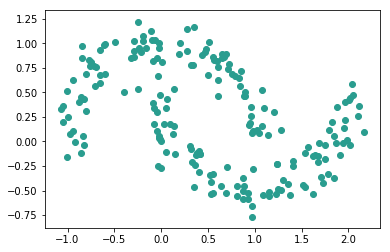

In [70]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], color=green)

In [109]:
# cluster the data based on the distance
edges = []
for i in range(0,D.shape[0]):
    for j in range(0,D.shape[1]):
        if i != j:
            edges.append((D[i,j],i,j))

vertices = set([i for i in range(0,D.shape[0])])
#A, total_cost = prim(X,D, X[0])

In [122]:
edge_list, cost = prim(vertices,edges,100)

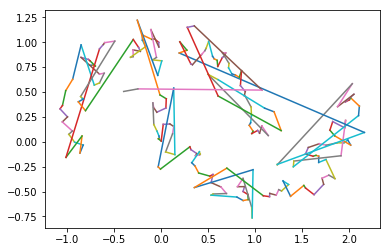

In [123]:
fig, ax = plt.subplots()
for i in range(0,len(edge_list)-1):
    plt.plot([X[edge_list[i][1],0],X[edge_list[i+1][1],0]],[X[edge_list[i][1],1],X[edge_list[i+1][1],1]])

In [105]:
A,B = prim(vertices,edges,0)

In [106]:
A

[(0.063589015437690397, 169),
 (0.044035902282844354, 119),
 (0.068033404890312899, 144),
 (0.029156089949783168, 113),
 (0.073328484284572767, 166),
 (0.072698784773677846, 44),
 (0.052933879789282351, 171),
 (0.097486111685746585, 114),
 (0.098850082141426432, 68),
 (0.028557992486676387, 20),
 (0.057189874682920208, 157),
 (0.046753443910879655, 30),
 (0.098799002130847774, 179),
 (0.10725047724512547, 150),
 (0.046573681668905541, 70),
 (0.066438672572789029, 53),
 (0.15220790431429235, 118),
 (0.15754443802050275, 19),
 (0.19622871808323086, 61),
 (0.10918677806644134, 105),
 (0.022457248171279458, 172),
 (0.060393279769613763, 38),
 (0.15716331488463448, 69),
 (0.022608290909657373, 62),
 (0.044294409150583698, 190),
 (0.038468165819979472, 152),
 (0.026643162965396337, 178),
 (0.081461452784217167, 197),
 (0.091521997887972203, 194),
 (0.051375563281570377, 120),
 (0.088857279488446336, 112),
 (0.059486280680812943, 86),
 (0.09777331525099188, 100),
 (0.12476572373120438, 37),
 

In [125]:
edge_list, cost = kruskal(vertices,edges)

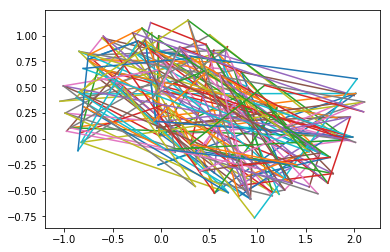

In [126]:
fig, ax = plt.subplots()
for i in range(0,len(edge_list)-1):
    plt.plot([X[edge_list[i][1],0],X[edge_list[i+1][1],0]],[X[edge_list[i][1],1],X[edge_list[i+1][1],1]])